<a href="https://colab.research.google.com/github/Damanger/COLAB_CF/blob/main/LPF_HPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math

In [ ]:
#Calculating the radius
def calculateRadius(centre, i, j):
    radius = max(1, math.sqrt(math.pow((i - centre[0]), 2) + math.pow((j - centre[1]), 2)))
    return radius

In [ ]:
#Creating Butterworth low pass filter
def create_butterworth_low_pass_filter( width, height, d, n):
  lp_filter = np.zeros((height, width, 2), np.float32)
  centre = (width/2, height/2)
  for i in range(0, lp_filter.shape[1]):
    for j in range(0, lp_filter.shape[0]):
      radius = calculateRadius(centre, i, j)
      lp_filter[j, i] = 1 / (1 + math.pow((radius / d), (2 * n)))

  return lp_filter

In [ ]:
#Creating Butterworth high pass filter
def butterworth_high_pass_filter(width, height, d, n):
  return 1 - (create_butterworth_low_pass_filter(width, height, d, n))

In [ ]:
#Creating Gaussian low pass filter
def create_gaussian_low_pass_filter(width, height, d):
  lp_filter = np.zeros((height, width, 2), np.float32)
  centre = (width/2, height/2)
  for i in range(0, lp_filter.shape[1]):
    for j in range(0, lp_filter.shape[0]):
      radius = calculateRadius(centre, i, j)
      lp_filter[j, i] = math.exp(-math.pow((radius / d), 2))

  return lp_filter

In [ ]:
#Creating Gaussian high pass filter
def gaussian_high_pass_filter(width, height, d):
  return 1 - (create_gaussian_low_pass_filter(width, height, d))

In [ ]:
#Creating Ideal low pass filter
def create_ideal_low_pass_filter(width, height, d):
  lp_filter = np.zeros((height, width, 2), np.float32)
  centre = (width/2, height/2)
  for i in range(0, lp_filter.shape[1]):
    for j in range(0, lp_filter.shape[0]):
      radius = calculateRadius(centre, i, j)
      if radius <= d:
        lp_filter[j, i] = 1

  return lp_filter

In [ ]:
#Creating Ideal high pass filter
def ideal_high_pass_filter(width, height, d):
  return 1 - (create_ideal_low_pass_filter(width, height, d))

In [ ]:
#Calculating the Fourier Transformation
def apply_filter(image, filter_function, d, n=None):
    dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    #Creating the filter
    height, width = image.shape
    if n is not None:
        filter_mask = filter_function(width, height, d, n)
    else:
        filter_mask = filter_function(width, height, d)

    #Appliying the filter
    filtered_dft = dft_shift * filter_mask

    #Getting the image back
    f_ishift = np.fft.ifftshift(filtered_dft)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back

In [ ]:
#Loading an image
image = cv.imread(cv.samples.findFile("Lena.png"), cv.IMREAD_GRAYSCALE)

In [ ]:
#LPFB
result_butterworth_lp = apply_filter(image, create_butterworth_low_pass_filter, d=30, n=2)

#HPFB
result_butterworth_hp = apply_filter(image, butterworth_high_pass_filter, d=30, n=2)

#LPFG
result_gaussian_lp = apply_filter(image, create_gaussian_low_pass_filter, d=30)

#HPFG
result_gaussian_hp = apply_filter(image, gaussian_high_pass_filter, d=30)

#LPFI
result_ideal_lp = apply_filter(image, create_ideal_low_pass_filter, d=30)

#HPFI
result_ideal_hp = apply_filter(image, ideal_high_pass_filter, d=30)

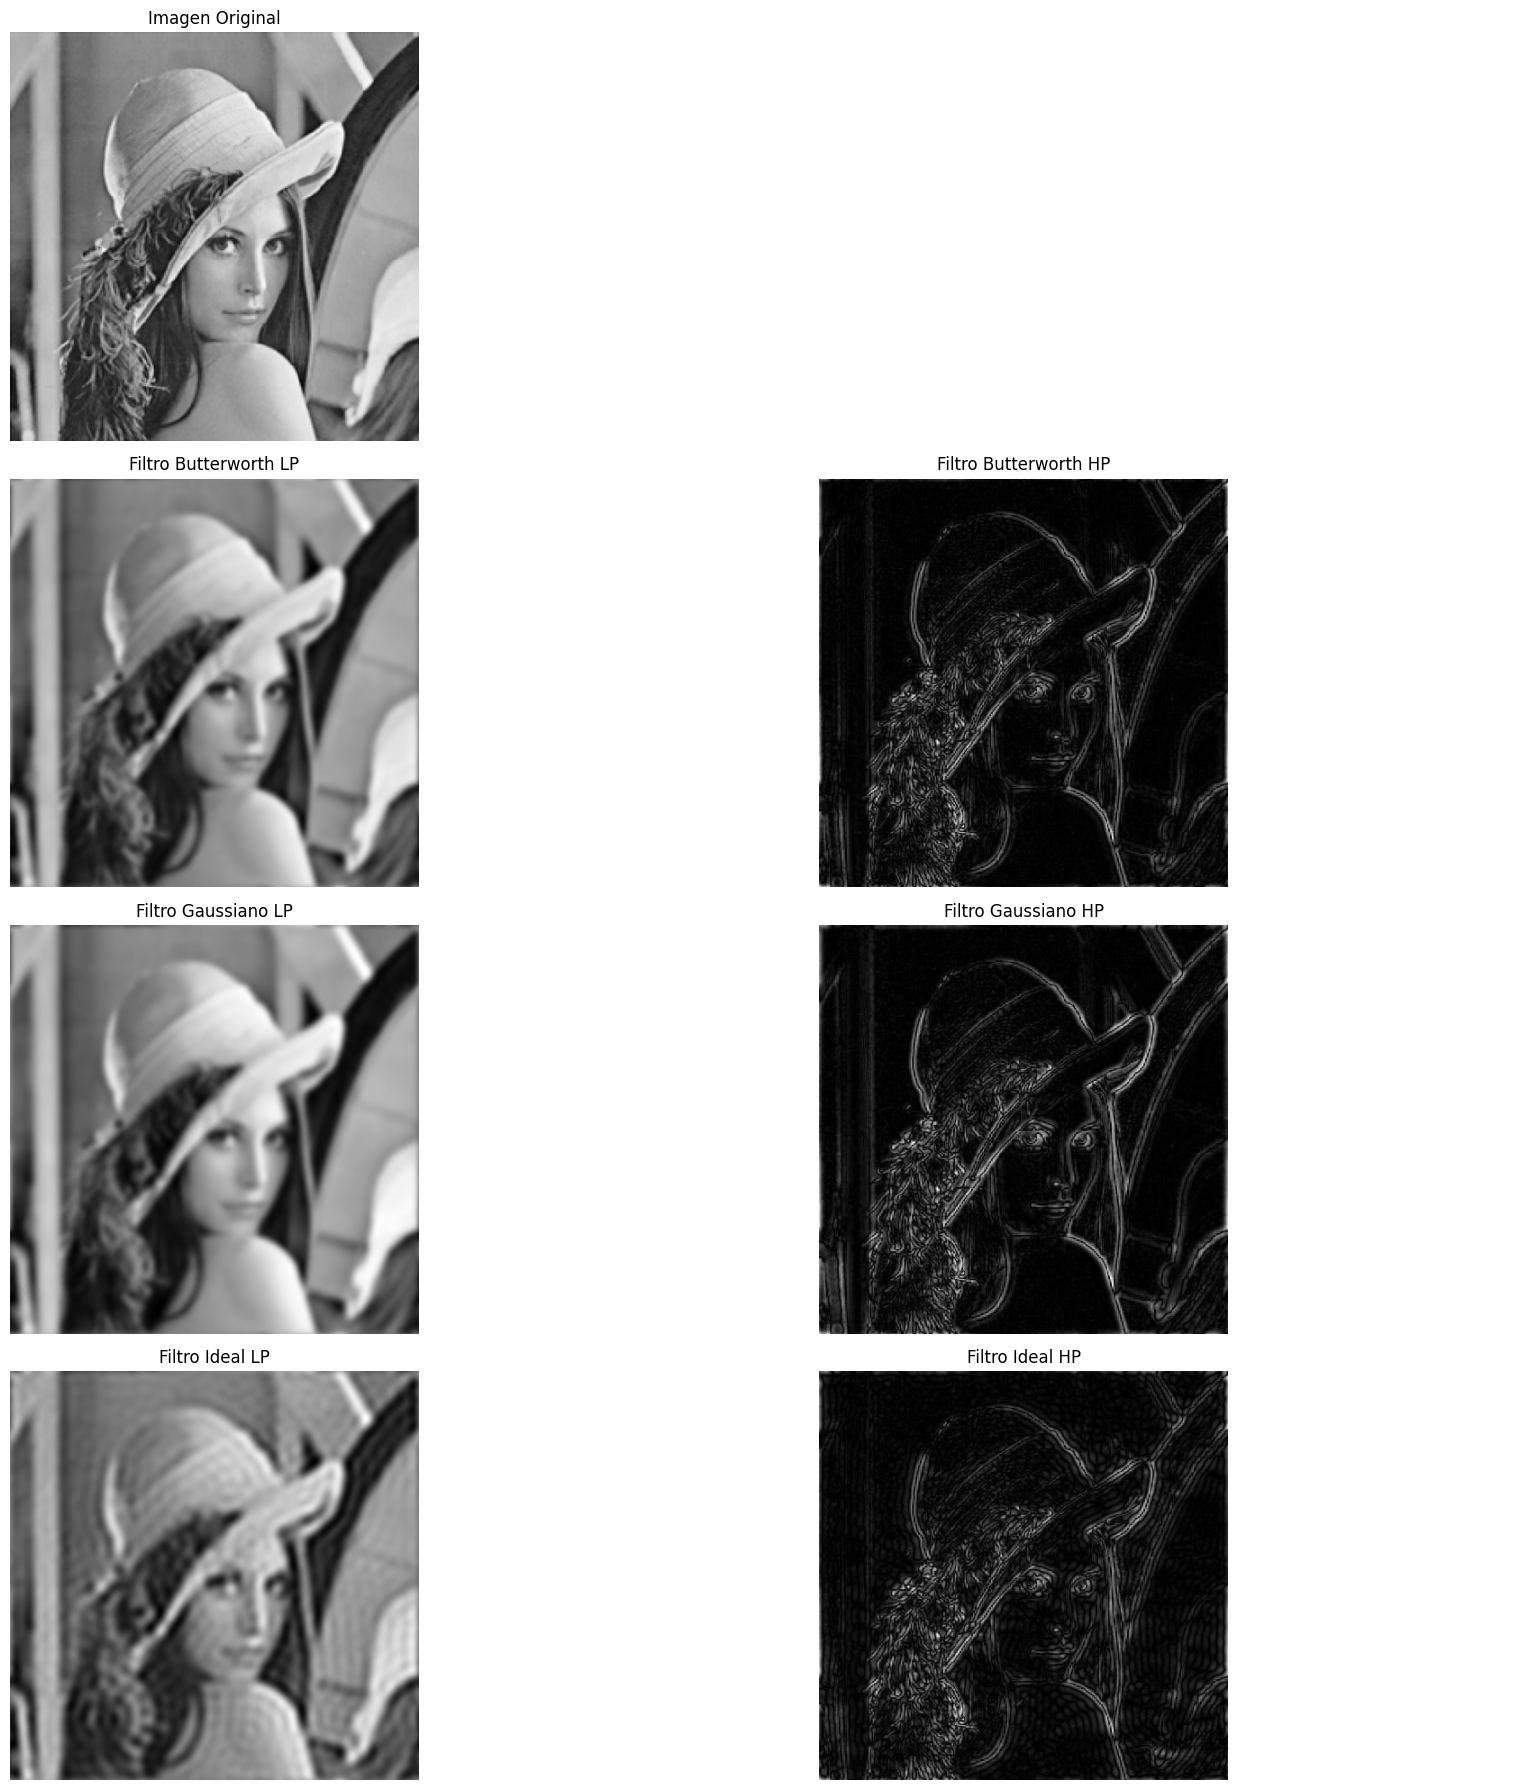

In [ ]:
#Plotting images
fig, axes = plt.subplots(4, 2, figsize=(18, 18))
axes = axes.ravel()

#Plotting images with tittles
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].axis('off')

axes[2].imshow(result_butterworth_lp, cmap='gray')
axes[2].set_title('Filtro Butterworth LP')
axes[2].axis('off')

axes[3].imshow(result_butterworth_hp, cmap='gray')
axes[3].set_title('Filtro Butterworth HP')
axes[3].axis('off')

axes[4].imshow(result_gaussian_lp, cmap='gray')
axes[4].set_title('Filtro Gaussiano LP')
axes[4].axis('off')

axes[5].imshow(result_gaussian_hp, cmap='gray')
axes[5].set_title('Filtro Gaussiano HP')
axes[5].axis('off')

axes[6].imshow(result_ideal_lp, cmap='gray')
axes[6].set_title('Filtro Ideal LP')
axes[6].axis('off')

axes[7].imshow(result_ideal_hp, cmap='gray')
axes[7].set_title('Filtro Ideal HP')
axes[7].axis('off')

plt.tight_layout()
plt.show()